[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1-yU8EOOu4j5eG6txlnW8iRtaYPDQHtqm?usp=sharing)

### **What Are Gaussian Mixture Models?**

A **Gaussian Mixture Model** is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions. Each Gaussian distribution represents a different cluster or group within the dataset.

In simpler terms, imagine you have a dataset with overlapping groups (clusters) of data points. A GMM can help identify these hidden groups by modeling each group as a bell-shaped curve (Gaussian). The model then combines these curves to explain the overall distribution of the data.

---

### **Key Components of a GMM**

1. **Mixture Coefficients**:
   - These are the "weights" that determine the proportion of each Gaussian in the mixture.
   - For example, if 60% of your data points belong to Cluster A and 40% to Cluster B, the mixture coefficients will reflect this.

2. **Mean Vectors (μ)**:
   - Each Gaussian has a mean vector that represents the center of its cluster.
   - These means define where each group is located in the dataset.

3. **Covariance Matrices (Σ)**:
   - These matrices describe how the data points are spread out within each cluster.
   - They capture whether clusters are spherical, elongated, or oriented in specific ways.

---

### **How GMMs Are Used for Clustering**

1. **Modeling the Data**:
   - A GMM assumes that the observed data is a mix of multiple Gaussian distributions. Each distribution corresponds to a cluster.
   - The model tries to find the best fit by estimating the parameters (mixture coefficients, means, and covariance matrices).

2. **Probabilistic Approach**:
   - Unlike traditional clustering methods (e.g., k-means), GMMs are probabilistic. Data points can belong to multiple clusters with varying probabilities.
   - For example, a data point might have a 70% chance of belonging to Cluster A and a 30% chance of belonging to Cluster B.

3. **Expectation-Maximization (EM) Algorithm**:
   - The EM algorithm is commonly used to estimate the parameters of a GMM.
   - It iteratively improves the parameter estimates by alternating between two steps:
     - **E-step**: Estimate the probabilities of each data point belonging to each cluster.
     - **M-step**: Update the model parameters (means, covariances, and mixture coefficients) based on these probabilities.

4. **Identifying Clusters**:
   - After training the GMM, you can assign each data point to the cluster with the highest probability of containing it.
   - This results in clear cluster assignments, even when clusters overlap.

---

### **Advantages of Using GMMs for Clustering**

- **Probabilistic Assignments**: Data points are assigned probabilities of belonging to each cluster, providing a nuanced understanding of cluster membership.
- **Flexibility**: GMMs can handle clusters with different shapes and sizes by adjusting the covariance matrices.
- **Robustness**: GMMs are less sensitive to initialization compared to some other clustering algorithms.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# Helper function to plot ellipses
def plot_ellipse(mean, cov, ax=None, n_std=2.0):
    pearson = cov[0, 1]
    ellipse_radius_x = n_std * np.sqrt(cov[0, 0])
    ellipse_radius_y = n_std * np.sqrt(cov[1, 1])

    ellipse_angle = np.degrees(np.arctan2(pearson, cov[0, 0]))
    ellipse = Ellipse(
        xy=mean,
        width=ellipse_radius_x * 2,
        height=ellipse_radius_y * 2,
        angle=ellipse_angle,
        edgecolor="r",
        fc="None",
        lw=1,
    )

    if ax is None:
        ax = plt.gca()

    ax.add_patch(ellipse)

In [3]:
# Step 1: Generate synthetic data for two classes
n_samples = 100
mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]
data0 = np.random.multivariate_normal(mean0, cov0, n_samples)

mean1 = [3, 3]
cov1 = [[2, 0], [0, 2]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

X_train = np.vstack((data0[:50], data1[:50]))
y_train = np.array([0] * 50 + [1] * 50)

X_test = np.vstack((data0[50:], data1[50:]))
y_test = np.array([0] * 50 + [1] * 50)

X = np.vstack((X_train, X_test))

In [4]:
# Step 2: Fit Gaussian Mixture Models to each class
gmm0 = GaussianMixture(n_components=1).fit(X_train[:50])
gmm1 = GaussianMixture(n_components=1).fit(X_train[50:])

# Step 3: Predict classes for test data and compute accuracy
y_pred = []
for x in X_test:
    like0 = gmm0.score(x.reshape(1, -1))
    like1 = gmm1.score(x.reshape(1, -1))
    if like0 > like1:
        y_pred.append(0)
    else:
        y_pred.append(1)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.980


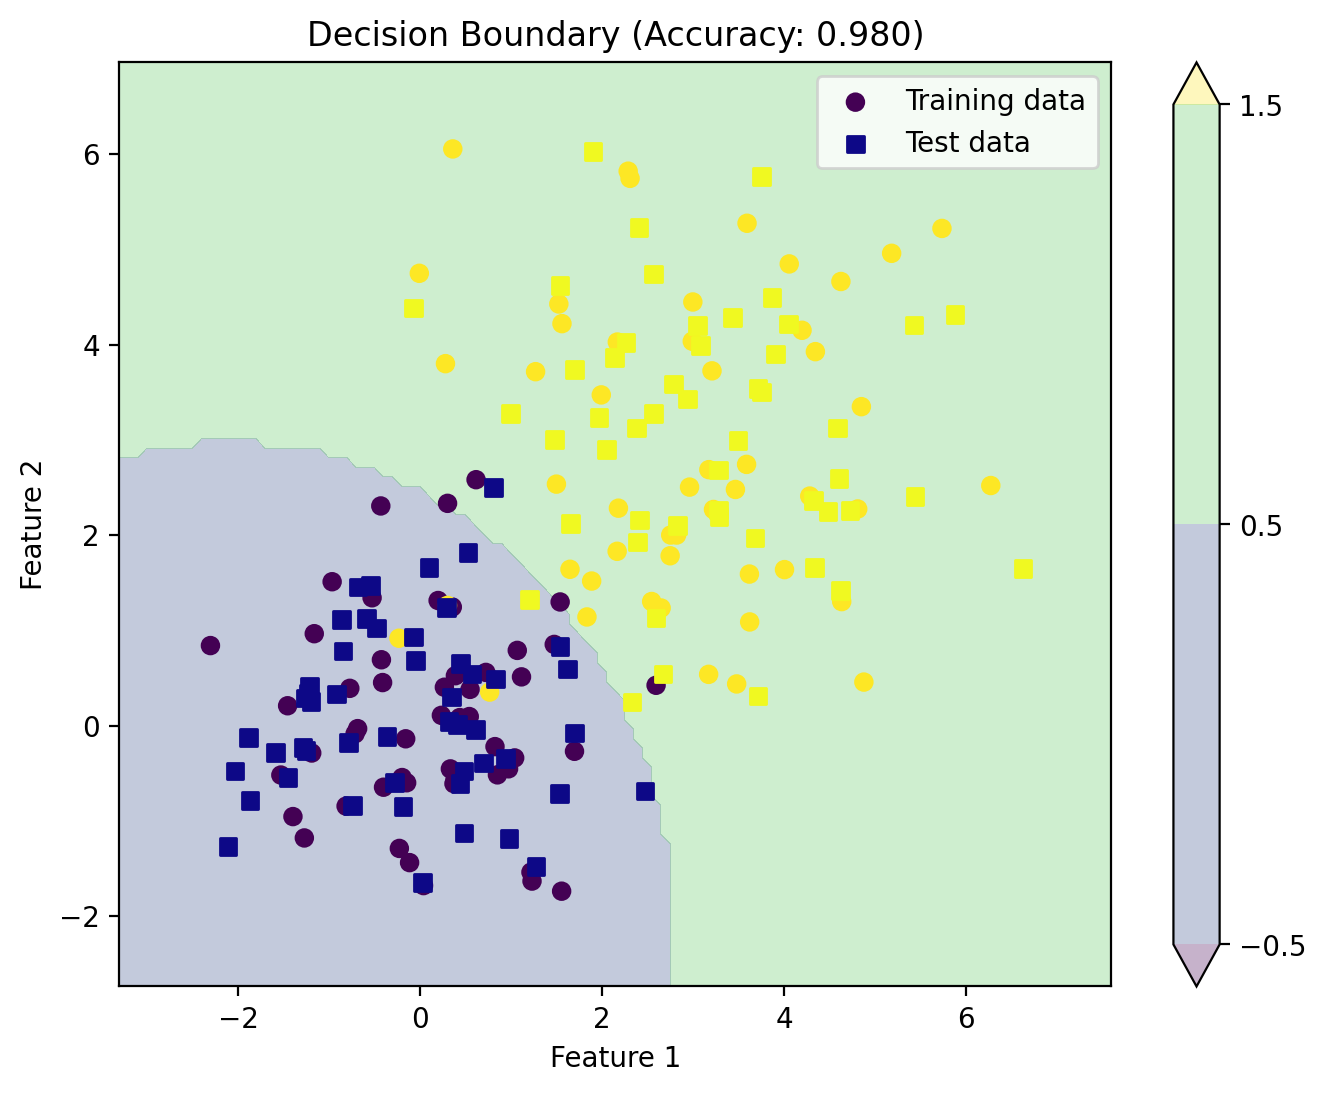

In [5]:
# Step 4: Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([0] * len(grid))
for i, (x, y) in enumerate(zip(grid[:, 0], grid[:, 1])):
    like0 = gmm0.score(np.array([x, y]).reshape(1, -1))
    like1 = gmm1.score(np.array([x, y]).reshape(1, -1))
    if like0 > like1:
        Z[i] = 0
    else:
        Z[i] = 1

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis", levels=[-0.5, 0.5, 1.5], extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="plasma", marker="s", label="Test data")

plt.colorbar(contour)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Decision Boundary (Accuracy: {accuracy:.3f})")
plt.legend()
plt.show()

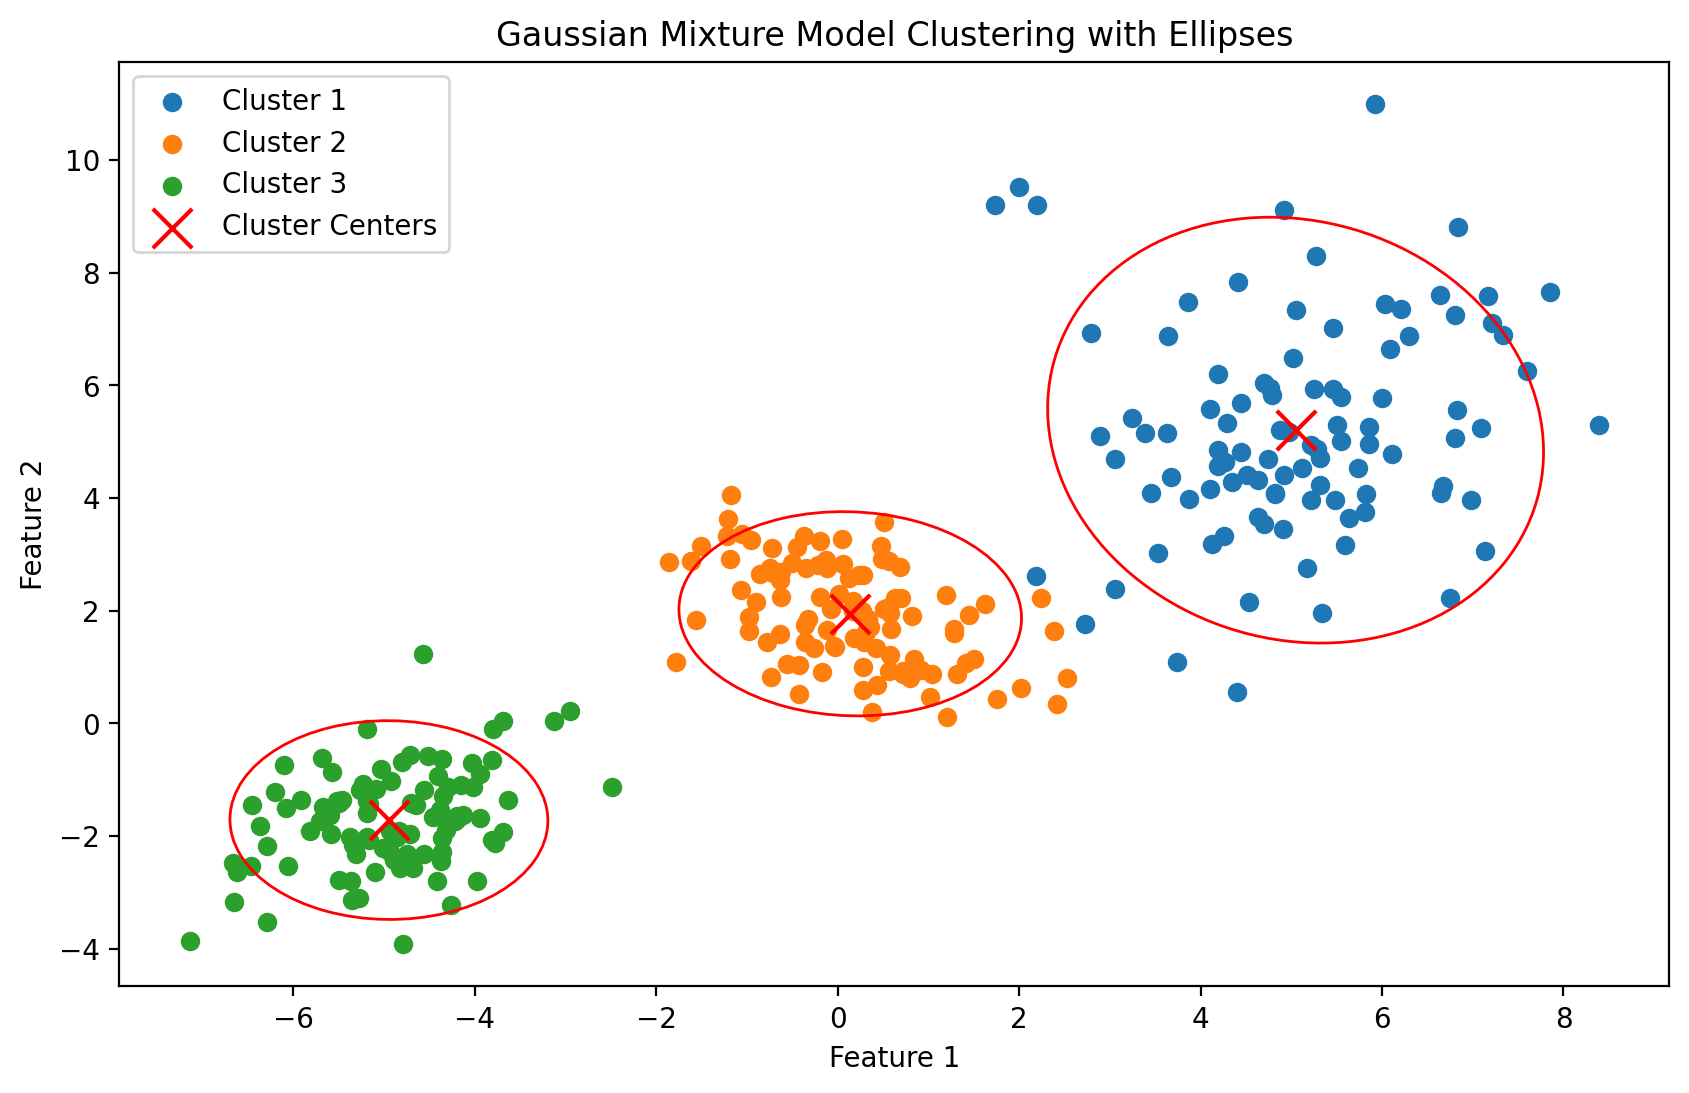

Silhouette Score: 0.6612831897633845
Adjusted Rand Index: 0.9800680223095938


In [6]:
# Step 1: Generate synthetic data with multiple clusters
n_samples = 300
cluster_centers = np.array([[-5, -2], [0, 2], [5, 5]])
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]], [[3, 0], [0, 3]]]

X = np.array(
    [
        np.random.multivariate_normal(center, cov, int(n_samples / 3))
        for center, cov in zip(cluster_centers, covariances)
    ]
)

X = np.vstack(X)

# Step 2: Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)

# Step 3: Predict cluster labels
labels = gmm.predict(X)

# Step 4: Visualize the clusters and their means
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}")

    # Plot the ellipse for this cluster
    plot_ellipse(gmm.means_[i], gmm.covariances_[i])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker="x", s=200, c="red", label="Cluster Centers")
plt.title("Gaussian Mixture Model Clustering with Ellipses")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 5: Evaluate clustering performance
from sklearn.metrics import silhouette_score, adjusted_rand_score

print("Silhouette Score:", silhouette_score(X, labels))
print(
    "Adjusted Rand Index:", adjusted_rand_score(labels, np.array([0] * 100 + [1] * 100 + [2] * 100))
)

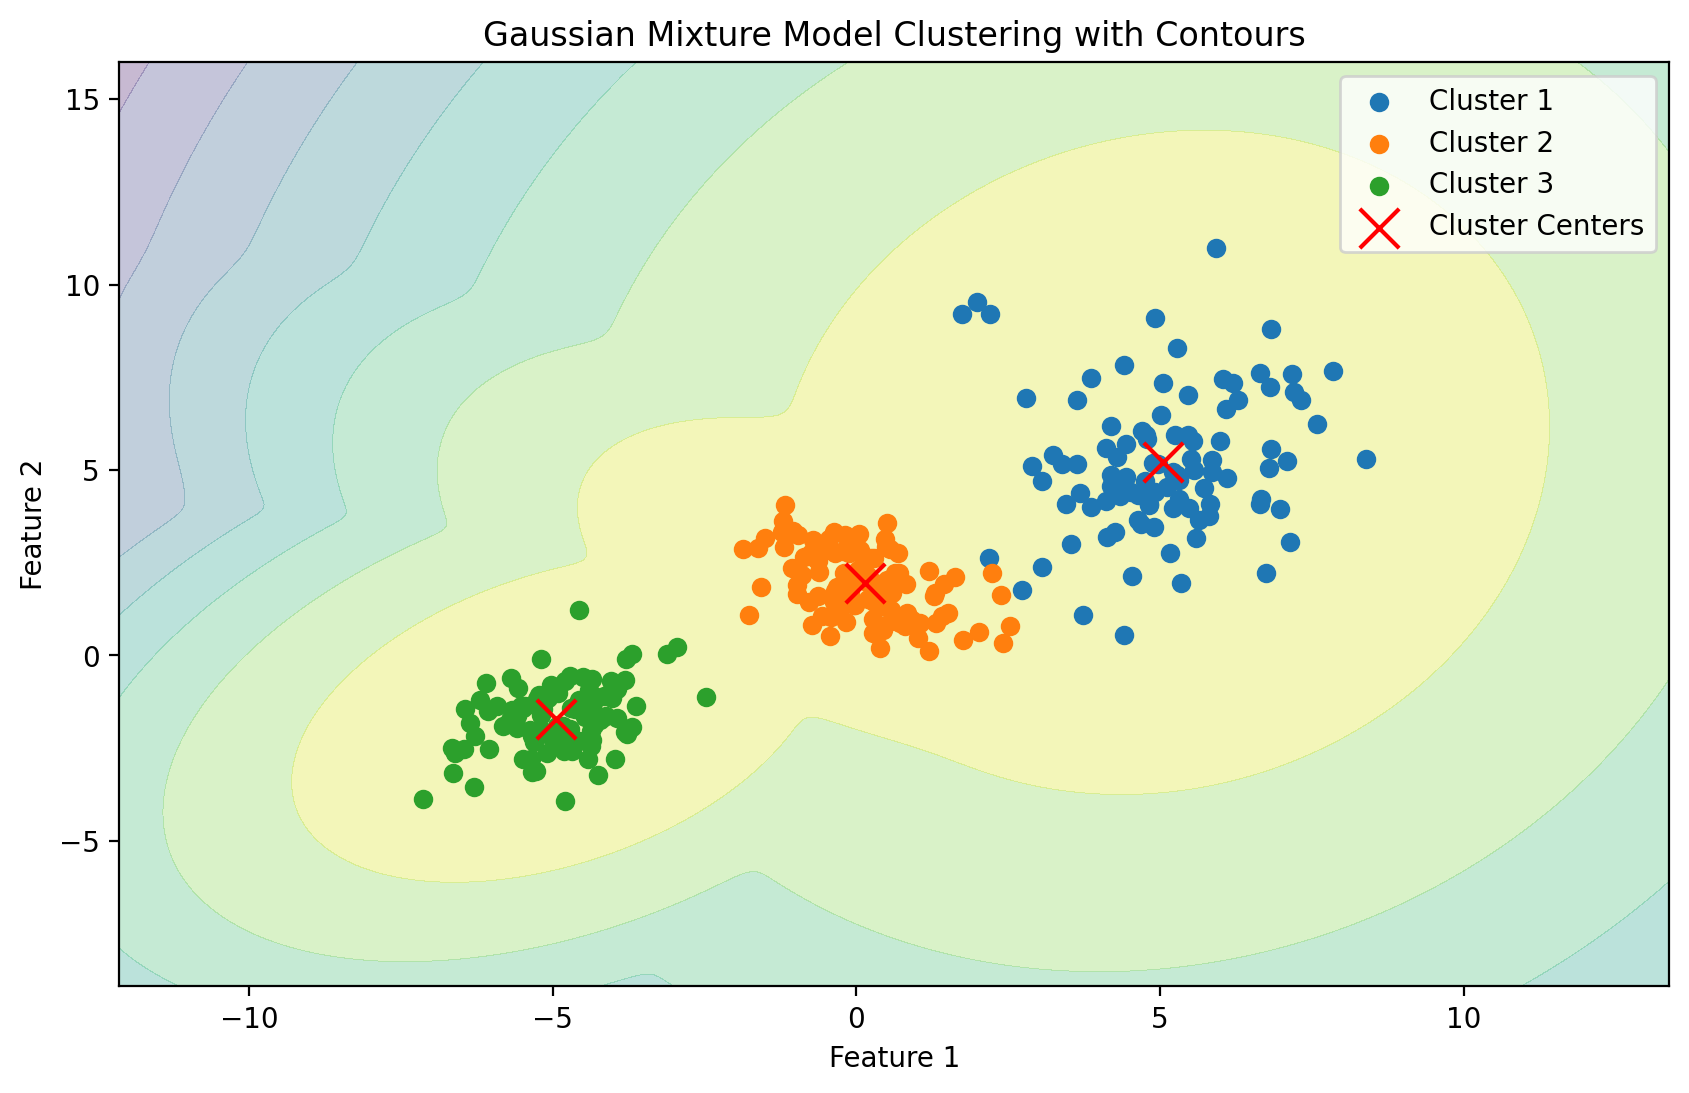

In [7]:
# Step 6: Plot Gaussian contours
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5

# Generate a grid of points to evaluate the GMM
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}")
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker="x", s=200, c="red", label="Cluster Centers")
plt.title("Gaussian Mixture Model Clustering with Contours")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()